In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
import scipy
import scipy.stats
from scipy.stats import pearsonr

In [4]:
drive.mount('household_power_consumption')

Drive already mounted at household_power_consumption; to attempt to forcibly remount, call drive.mount("household_power_consumption", force_remount=True).


In [22]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip', sep=';',header =0, low_memory = False, na_values = '?', infer_datetime_format=True,
                 parse_dates={'datetime':[0,1]}, index_col=['datetime'])

In [23]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [19]:
import time
date_str = "6/29/2006"
time_tuple = time.strptime(date_str, "%m/%d/%Y")
timestamp = time.mktime(time_tuple)

In [24]:
df.replace('?', 'nan', inplace=True) 
# make dataset numeric
df = df.astype('float32')

In [25]:
df = df.fillna(df.mean())

In [26]:
df_res = df.resample('D').sum()
print(df_res.head())

            Global_active_power  ...  Sub_metering_3
datetime                         ...                
2006-12-16          1209.176025  ...          4926.0
2006-12-17          3390.459961  ...         13341.0
2006-12-18          2203.825928  ...         14018.0
2006-12-19          1666.193970  ...          6197.0
2006-12-20          2225.748047  ...         14063.0

[5 rows x 7 columns]


Text(0, 0.5, 'Global active power')

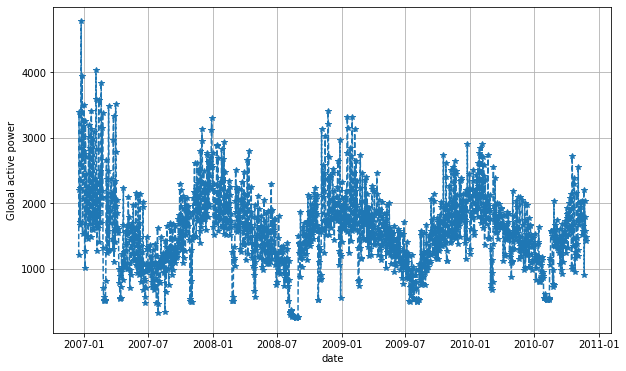

In [44]:
plt.figure(figsize=(10,6))
plt.plot(df_res.index, df_res.Global_active_power, '--', marker='*',  )
plt.grid()
plt.xlabel('date', )
plt.ylabel('Global active power')

In [30]:
corr,_ = pearsonr(df_res.Voltage,df_res.Global_intensity)
corr

0.05221350712869457

In [31]:
train_data = df_res.iloc[:1077,:]

In [32]:
test_data = df_res.iloc[1077:,:]

In [33]:
from fbprophet import Prophet

In [34]:
train_data.reset_index(inplace = True)
train_data.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2,2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
3,2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
4,2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [35]:
df_train = train_data.iloc[:,:2]

In [37]:
df_train = df_train.rename(columns={"date": "x", "Global active power": "y"})
df_train.head()

,ds,y
0,2006-12-16,1209.176025
1,2006-12-17,3390.459961
2,2006-12-18,2203.825928
3,2006-12-19,1666.193970
4,2006-12-20,2225.748047


In [38]:
test_data.reset_index(inplace = True)
test_data.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2009-11-27,1380.026001,133.052002,348276.68750,5704.000000,0.0,396.0,11599.0
1,2009-11-28,1858.949951,225.218002,347898.87500,7784.799805,3199.0,386.0,14350.0
2,2009-11-29,1650.962036,191.056000,350364.56250,6878.399902,1073.0,3061.0,7828.0
3,2009-11-30,1745.189941,153.382004,351020.59375,7232.200195,1080.0,361.0,12039.0
4,2009-12-01,1756.378052,141.873993,349391.75000,7312.799805,0.0,354.0,10821.0


In [45]:
df_tests = test_data.iloc[:,:2]

In [48]:
df_tests = df_tests.rename(columns={"date": "x", "Global active power": "y"})
df_tests.head()

,ds,y
0,2009-11-27,1380.026001
1,2009-11-28,1858.949951
2,2009-11-29,1650.962036
3,2009-11-30,1745.189941
4,2009-12-01,1756.378052


In [70]:
model = Prophet()
model.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [73]:
forecast = model.predict(df_tests) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1580.084009,1558.244529,2662.647749,1580.084009,1580.084009,519.056899,519.056899,519.056899,-64.127019,-64.127019,-64.127019,583.183918,583.183918,583.183918,0.0,0.0,0.0,2099.140908
1,2009-11-28,1580.207768,1846.754900,2958.498682,1580.207768,1580.207768,822.213567,822.213567,822.213567,245.813256,245.813256,245.813256,576.400311,576.400311,576.400311,0.0,0.0,0.0,2402.421335
2,2009-11-29,1580.331526,1841.379187,2924.059393,1580.331526,1580.331526,796.157722,796.157722,796.157722,228.519177,228.519177,228.519177,567.638545,567.638545,567.638545,0.0,0.0,0.0,2376.489248
3,2009-11-30,1580.455285,1427.255664,2502.149086,1580.455285,1580.455285,396.118617,396.118617,396.118617,-161.286790,-161.286790,-161.286790,557.405408,557.405408,557.405408,0.0,0.0,0.0,1976.573902
4,2009-12-01,1580.579043,1523.422444,2659.020647,1580.579043,1580.579043,516.895388,516.895388,516.895388,-29.332428,-29.332428,-29.332428,546.227816,546.227816,546.227816,0.0,0.0,0.0,2097.474431


In [87]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].head()
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2009-11-27,2099.140908,1558.244529,2662.647749,1580.084009,1580.084009,1580.084009
1,2009-11-28,2402.421335,1846.754900,2958.498682,1580.207768,1580.207768,1580.207768
2,2009-11-29,2376.489248,1841.379187,2924.059393,1580.331526,1580.331526,1580.331526
3,2009-11-30,1976.573902,1427.255664,2502.149086,1580.455285,1580.455285,1580.455285
4,2009-12-01,2097.474431,1523.422444,2659.020647,1580.579043,1580.579043,1580.579043


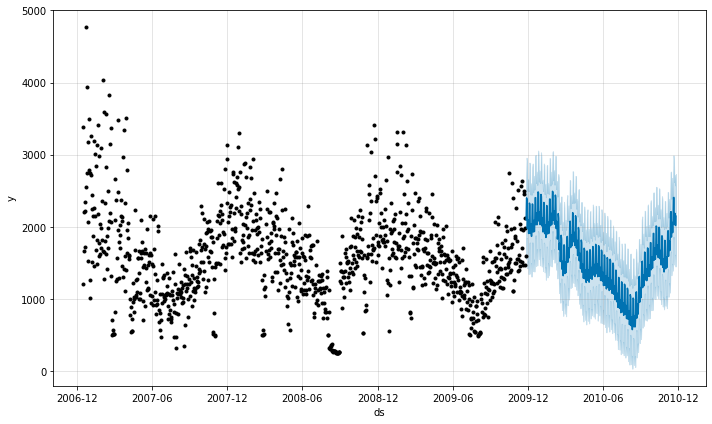

In [88]:
model.plot(forecast)
plt.show()

In [92]:
from sklearn import metrics
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [93]:
MAPE = Metric(df_tests['y'],forecast['yhat'])
print(f'MAPE: {round(MAPE,2)}')

MAPE: 20.82


In [94]:
RMSE = np.sqrt(metrics.mean_squared_error(df_tests['y'],forecast['yhat']))
RMSE
round(RMSE,2)

374.6

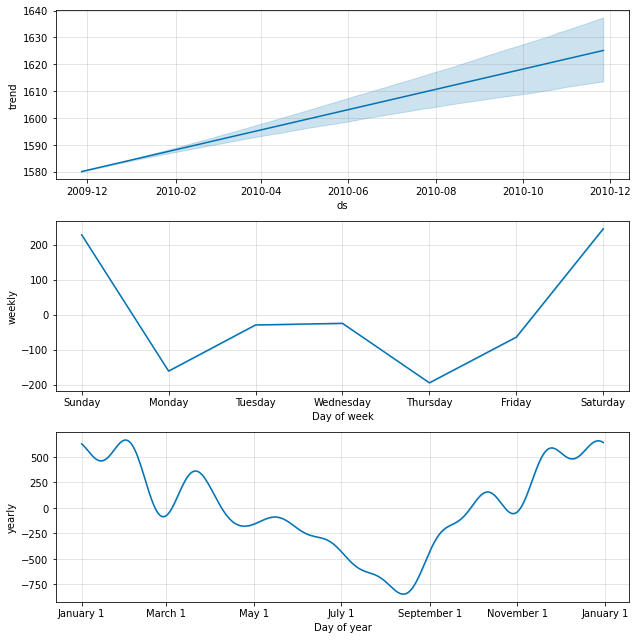

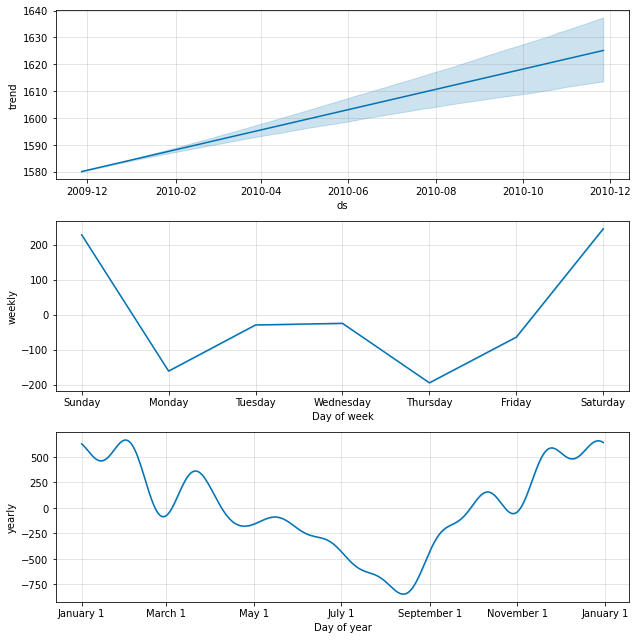

In [96]:
model.plot_components(forecast)

In [98]:
df_res.reset_index(inplace=True)

In [99]:
df_res.head()

,level_0,index,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,1,1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2,2,2,2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
3,3,3,2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
4,4,4,2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0
